# College Admission Prediction Model

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = UserWarning )

### Load the Data


In [11]:
raw_data = pd.read_csv(r"C:\Users\Anuj\Downloads\2.02.+Binary+predictors.csv")
raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


### Mapping the data

In [12]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


### Declare the dependent and independent variables

In [13]:
y = data['Admitted']
x1 = data[['SAT','Gender']]

### Regression

In [14]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Thu, 22 Aug 2024   Pseudo R-squ.:                  0.8249
Time:                        17:09:05   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [15]:
np.exp(1.94)

6.958750970637272

## Accuracy

In [16]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [17]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [18]:
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [19]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [20]:
# For 69, Pridictions model predicted 0 and the outcome was 0.
# For 5, Predictions model predicted 0 but the outcome was 1.
# For 4, Pridictions model predicted 1 but the outcome was 0.
# For 90, Pridictions model predicted 1 and the outcome was 1.

### Our model was Accurate for 159/168 cases

In [21]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
round(accuracy_train*100,2)

94.64

### Testing the model and assessing its accuracy

In [23]:
# Load the test dataset
test = raw_data
test.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [24]:
# Mapping the data
test['Admitted'] = test['Admitted'].map({'Yes': 1, 'No': 0})
test['Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
test.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [25]:
# Check how inputs should look like
x.head()

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0


In [26]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data.head()

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0


In [30]:
def confusion_matrix(data,actual_values,model):
        # data = input data
        pred_values = model.predict(data)
        # Our function will use already created regression model to make prediction based on data.
        bins=np.array([0,0.5,1])
        # Creating a histogram where values from 0 to 0.5 is considered 0.
        # For 0.5 to 1 is considered 1.
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Summarize the values in table
        # Calculate the accuracy
        accuracy = round(((cm[0,0]+cm[1,1])/cm.sum())*100,2)
        # Return the confusion matrix and the accuracy
        return cm, accuracy

In [31]:
# Creating a confusion matrix with the test data
cm = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[69.00, 5.00],
        [4.00, 90.00]]),
 94.64)

### The Accuracy of our model is 94.64
### That means the model might be overfitting

In [32]:
# Formatti
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


### Missclassification Rate

In [34]:
print ('Missclassification rate: '+str((9/(69+90))*100))
# 2(1+1) are the wrong predictions
# 19(12+5) are the correct predictions

Missclassification rate: 5.660377358490567


# k-Means Cluster Analysis

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [36]:
# Selecting features for clustering
X = data[['SAT', 'Gender']]  

In [37]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [38]:
# Adding cluster labels to the dataset
data['Cluster'] = kmeans.labels_

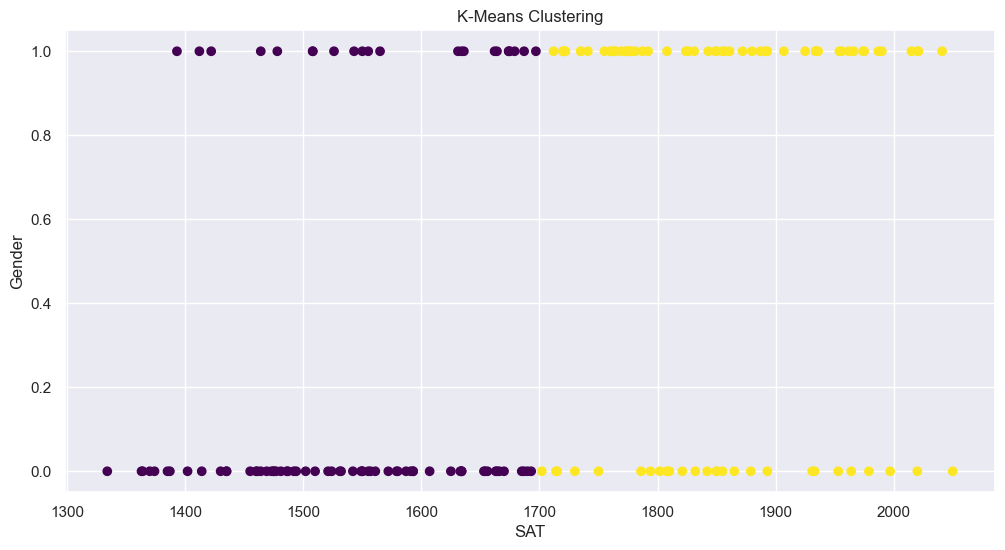

In [39]:
# Plotting the clusters
plt.figure(figsize=(12, 6))
plt.scatter(data['SAT'], data['Gender'], c=data['Cluster'], cmap='viridis')
plt.xlabel('SAT')
plt.ylabel('Gender')
plt.title('K-Means Clustering')
plt.show()

In [40]:
# Displaying the first few rows with the cluster labels
data.head()

,SAT,Admitted,Gender,Cluster
0,1363,0,0,0
1,1792,1,1,1
2,1954,1,1,1
3,1653,0,0,0
4,1593,0,0,0


## Standardizing Variable

In [41]:
# Import Library
from sklearn import preprocessing
# Scaling the inputs
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[0.00, -1.82, -0.93],
       [0.00, 0.53, 1.07],
       [0.00, 1.42, 1.07],
       [0.00, -0.23, -0.93],
       [0.00, -0.56, -0.93],
       [0.00, 0.33, 1.07],
       [0.00, 0.44, 1.07],
       [0.00, 1.05, 1.07],
       [0.00, 1.08, 1.07],
       [0.00, -0.63, -0.93],
       [0.00, 0.89, 1.07],
       [0.00, 1.01, 1.07],
       [0.00, -0.17, 1.07],
       [0.00, -1.82, -0.93],
       [0.00, -0.01, -0.93],
       [0.00, 0.85, 1.07],
       [0.00, -0.34, -0.93],
       [0.00, -0.34, -0.93],
       [0.00, -0.32, 1.07],
       [0.00, 0.88, 1.07],
       [0.00, 1.60, 1.07],
       [0.00, 1.65, -0.93],
       [0.00, -1.50, 1.07],
       [0.00, -1.03, 1.07],
       [0.00, 0.14, 1.07],
       [0.00, 1.01, -0.93],
       [0.00, -0.34, 1.07],
       [0.00, 0.58, -0.93],
       [0.00, 0.84, 1.07],
       [0.00, 0.38, 1.07],
       [0.00, -1.29, -0.93],
       [0.00, -0.11, 1.07],
       [0.00, -0.22, -0.93],
       [0.00, 1.78, -0.93],
       [0.00, 0.85, -0.93],
       [0.00, 0.93, -0.9

## Using Elbow Method to identify the numbers of clusters


In [42]:
# Creating an empty list
wcss =[]

# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    kmeans = KMeans(i)
    # Fitting the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Appending the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
wcss

[336.0,
 143.1445200485449,
 83.51528011033106,
 45.90630109039863,
 31.318812230214775,
 17.914087040252163,
 14.443156944330738,
 11.290768064801423,
 8.135126910872025]

Text(0, 0.5, 'WCSS')

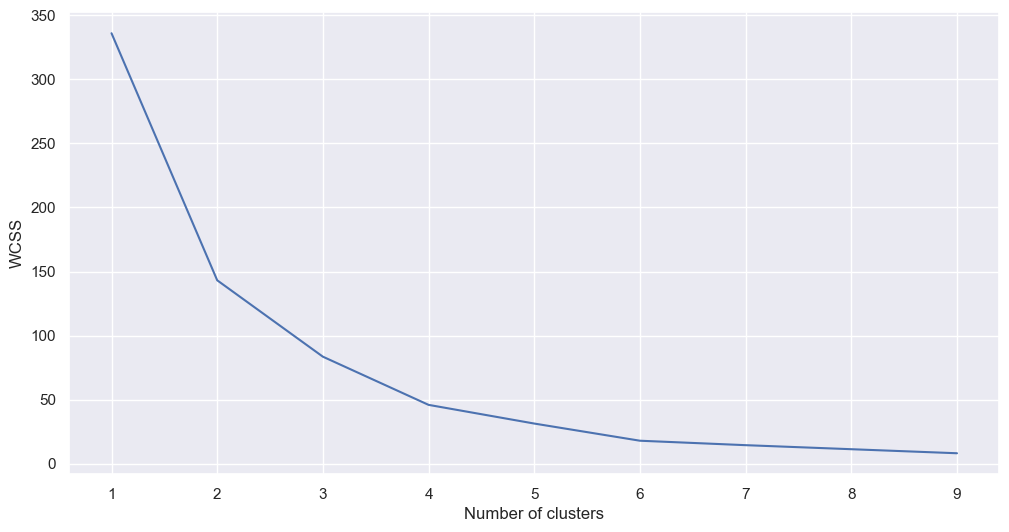

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Taking 2 Clusters

In [44]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

KMeans(n_clusters=2)

In [45]:
clusters_2 = x.copy()
clusters_2['cluster']=kmeans_2.fit_predict(x_scaled)

Text(0, 0.5, 'Gender')

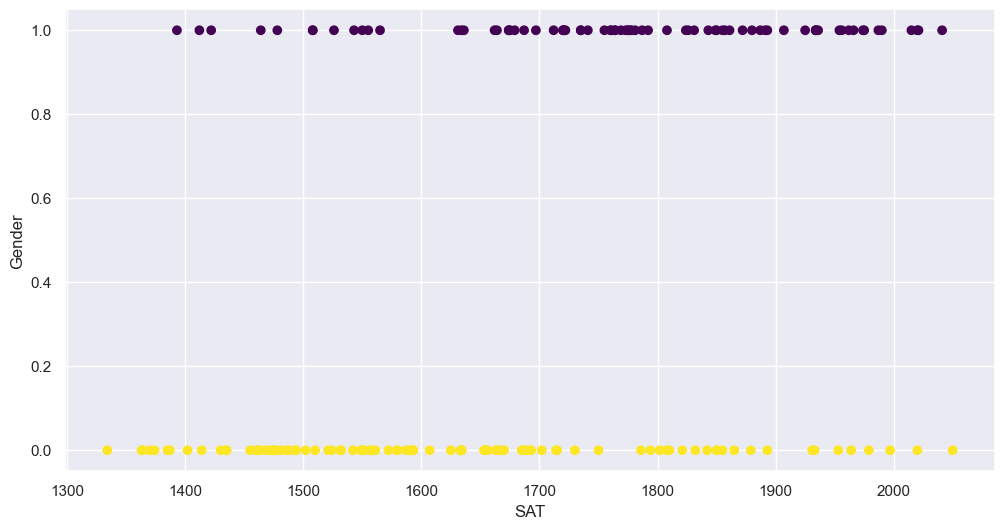

In [54]:
plt.figure(figsize=(12, 6))
plt.scatter(clusters_2['SAT'],clusters_2['Gender'],c=clusters_2['cluster'],cmap='viridis')
plt.xlabel('SAT')
plt.ylabel('Gender')

## Taking 4 Clusters

In [48]:
kmeans_4 = KMeans(4)
kmeans_4.fit(x_scaled)

KMeans(n_clusters=4)

In [49]:
clusters_4 = x.copy()
clusters_4['cluster']=kmeans_4.fit_predict(x_scaled)

Text(0, 0.5, 'Gender')

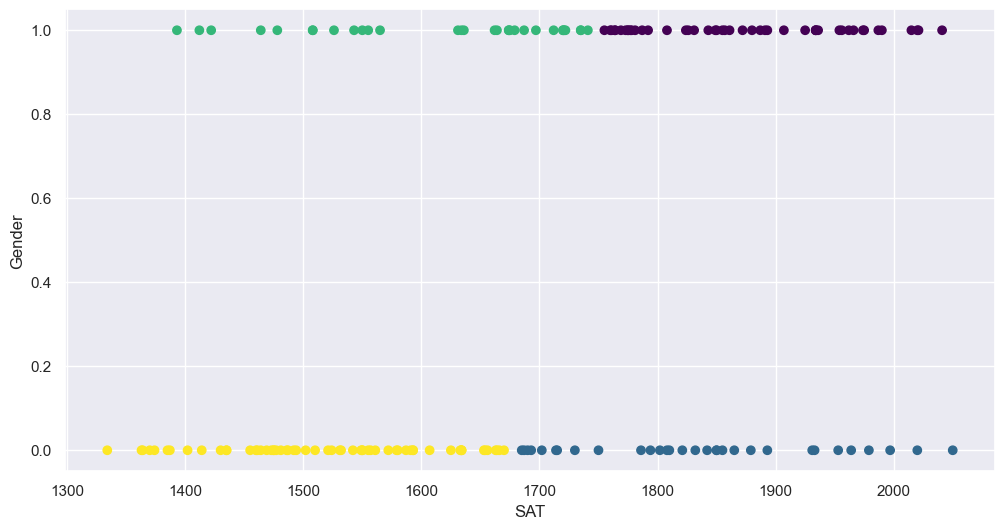

In [50]:
plt.figure(figsize=(12, 6))
plt.scatter(clusters_4['SAT'],clusters_4['Gender'],c=clusters_4['cluster'],cmap='viridis')
plt.xlabel('SAT')
plt.ylabel('Gender')

## Taking 6 Clusters

In [51]:
kmeans_6 = KMeans(6)
kmeans_6.fit(x_scaled)

KMeans(n_clusters=6)

In [52]:
clusters_6 = x.copy()
clusters_6['cluster']=kmeans_6.fit_predict(x_scaled)

Text(0, 0.5, 'Gender')

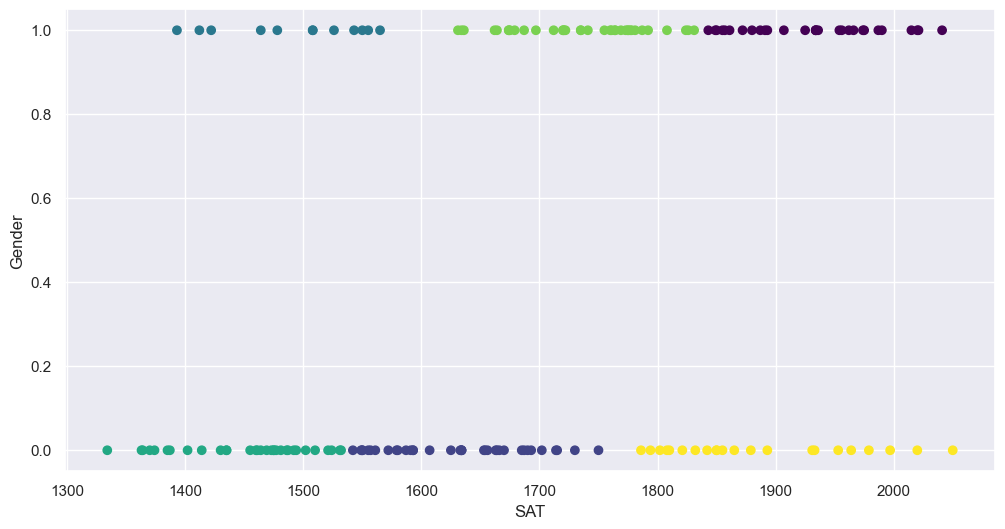

In [53]:
plt.figure(figsize=(12, 6))
plt.scatter(clusters_6['SAT'],clusters_6['Gender'],c=clusters_6['cluster'],cmap='viridis')
plt.xlabel('SAT')
plt.ylabel('Gender')